<a href="https://colab.research.google.com/github/Msadiq365/50-Days-Data-Science/blob/main/Original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

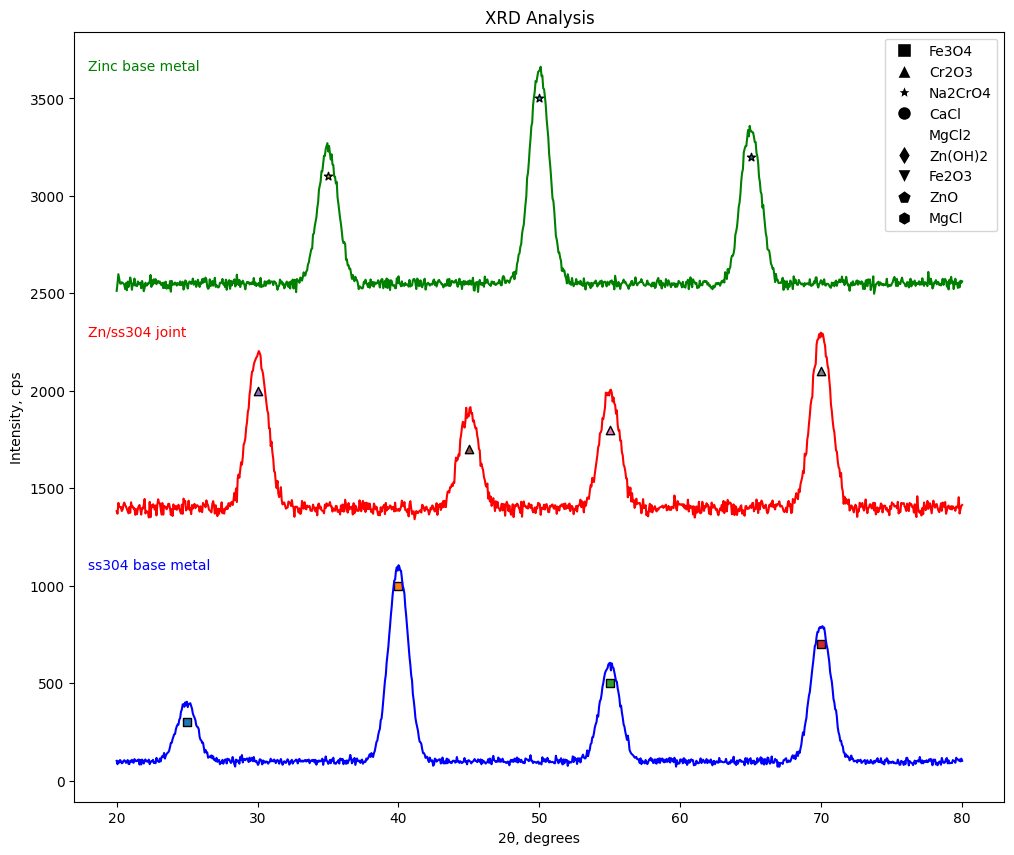

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Define the XRD pattern data
angles = np.linspace(20, 80, 1000)  # 2θ angles from 20 to 80 degrees
intensity_ss304 = np.random.normal(100, 10, size=1000)  # base intensity for ss304
intensity_joint = np.random.normal(200, 20, size=1000)  # base intensity for joint
intensity_zinc = np.random.normal(150, 15, size=1000)  # base intensity for Zinc

# Define peaks for the XRD patterns (arbitrary positions and intensities)
peaks_ss304 = [(25, 300), (40, 1000), (55, 500), (70, 700)]
peaks_joint = [(30, 800), (45, 500), (55, 600), (70, 900)]
peaks_zinc = [(35, 700), (50, 1100), (65, 800)]

# Add peaks to the base intensity
for pos, height in peaks_ss304:
    intensity_ss304 += height * np.exp(-((angles - pos) ** 2) / 1)

for pos, height in peaks_joint:
    intensity_joint += height * np.exp(-((angles - pos) ** 2) / 1)

for pos, height in peaks_zinc:
    intensity_zinc += height * np.exp(-((angles - pos) ** 2) / 1)

# Create the plot
plt.figure(figsize=(12, 10))

# Plot XRD patterns with offset
offset = 1200
plt.plot(angles, intensity_ss304, color='blue', label='ss304 base metal')
plt.plot(angles, intensity_joint + offset, color='red', label='Zn/ss304 joint')
plt.plot(angles, intensity_zinc + 2 * offset, color='green', label='Zinc base metal')

# Annotate the IMCs
imc_annotations = {
    'ss304 base metal': [(25, 300), (40, 1000), (55, 500), (70, 700)],
    'Zn/ss304 joint': [(30, 800 + offset), (45, 500 + offset), (55, 600 + offset), (70, 900 + offset)],
    'Zinc base metal': [(35, 700 + 2 * offset), (50, 1100 + 2 * offset), (65, 800 + 2 * offset)]
}

markers = ['s', '^', '*', 'o', 'x', 'd', 'v', 'p', 'h']
marker_labels = ['Fe3O4', 'Cr2O3', 'Na2CrO4', 'CaCl', 'MgCl2', 'Zn(OH)2', 'Fe2O3', 'ZnO', 'MgCl']

for (label, peaks), marker in zip(imc_annotations.items(), markers):
    for angle, height in peaks:
        plt.scatter(angle, height, marker=marker, edgecolor='black')

# Set labels and title
plt.xlabel('2θ, degrees')
plt.ylabel('Intensity, cps')
plt.title('XRD Analysis')

# Combine legend entries for markers
plt.legend(handles=[plt.Line2D([0], [0], marker=m, color='w', markerfacecolor='black', markersize=10, label=label) for m, label in zip(markers, marker_labels)], loc='upper right')

# Annotate the names of the curves
plt.text(18, np.max(intensity_ss304), 'ss304 base metal', color='blue', va='center')
plt.text(18, np.max(intensity_joint + offset), 'Zn/ss304 joint', color='red', va='center')
plt.text(18, np.max(intensity_zinc + 2 * offset), 'Zinc base metal', color='green', va='center')

# Show the plot
plt.show()